<a href="https://colab.research.google.com/github/baeksumin/k-project/blob/main/TimeSeries_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import json
import pandas as pd
import matplotlib.pyplot as plt
#from sympy import Derivative
import numpy as np
from pprint import pprint
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 저장된 삼성전자(KR7005930003) 데이터 가져오기

data_path = '/content/drive/MyDrive/[Shared]K-Project/data/'
with open(data_path + 'initial_data1.json',"r") as json_file:
    json_data = json.load(json_file) 

df = pd.read_json(json_data['KR7005930003'], orient ='index') 
samsung = df.transpose()
samsung

,TRD_DD,ISU_CD,ISU_NM,TDD_CLSPRC,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,MKTCAP,EPS,PER,BPS,PBR,DPS,DVD_YLD
0,2021/11/02,005930,삼성전자,"71,500","70,800","72,200","70,700","426,839,452,325,000","3,841",18.61,"39,406",1.81,"2,994",4.19
1,2021/11/01,005930,삼성전자,"69,900","70,200","70,600","69,900","417,287,800,245,000","3,841",18.20,"39,406",1.77,"2,994",4.28
2,2021/10/29,005930,삼성전자,"69,800","71,200","71,600","69,700","416,690,821,990,000","3,841",18.17,"39,406",1.77,"2,994",4.29
3,2021/10/28,005930,삼성전자,"70,700","69,500","72,200","69,500","422,063,626,285,000","3,841",18.41,"39,406",1.79,"2,994",4.23
4,2021/10/27,005930,삼성전자,"70,100","71,000","71,000","70,000","418,481,756,755,000","3,841",18.25,"39,406",1.78,"2,994",4.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6708,1995/05/08,005930,삼성전자,"121,000","122,000","122,000","120,500","6,578,606,045,000",-,-,-,-,-,-
6709,1995/05/06,005930,삼성전자,"122,000","122,000","123,500","122,000","6,632,974,690,000",-,-,-,-,-,-
6710,1995/05/04,005930,삼성전자,"122,500","124,000","124,500","122,000","6,660,159,012,500",-,-,-,-,-,-
6711,1995/05/03,005930,삼성전자,"123,500","119,500","126,500","119,500","6,714,527,657,500",-,-,-,-,-,-


In [25]:
df = pd.read_json(json_data['KR7005930003'], orient ='index') 
samsung = df.transpose()
samsung

,TRD_DD,ISU_CD,ISU_NM,TDD_CLSPRC,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,MKTCAP,EPS,PER,BPS,PBR,DPS,DVD_YLD
0,2021/11/02,005930,삼성전자,"71,500","70,800","72,200","70,700","426,839,452,325,000","3,841",18.61,"39,406",1.81,"2,994",4.19
1,2021/11/01,005930,삼성전자,"69,900","70,200","70,600","69,900","417,287,800,245,000","3,841",18.20,"39,406",1.77,"2,994",4.28
2,2021/10/29,005930,삼성전자,"69,800","71,200","71,600","69,700","416,690,821,990,000","3,841",18.17,"39,406",1.77,"2,994",4.29
3,2021/10/28,005930,삼성전자,"70,700","69,500","72,200","69,500","422,063,626,285,000","3,841",18.41,"39,406",1.79,"2,994",4.23
4,2021/10/27,005930,삼성전자,"70,100","71,000","71,000","70,000","418,481,756,755,000","3,841",18.25,"39,406",1.78,"2,994",4.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6708,1995/05/08,005930,삼성전자,"121,000","122,000","122,000","120,500","6,578,606,045,000",-,-,-,-,-,-
6709,1995/05/06,005930,삼성전자,"122,000","122,000","123,500","122,000","6,632,974,690,000",-,-,-,-,-,-
6710,1995/05/04,005930,삼성전자,"122,500","124,000","124,500","122,000","6,660,159,012,500",-,-,-,-,-,-
6711,1995/05/03,005930,삼성전자,"123,500","119,500","126,500","119,500","6,714,527,657,500",-,-,-,-,-,-


In [26]:
#시간순 재정렬.
samsung = samsung.sort_values(by=['TRD_DD'])
samsung.reset_index(drop=True,inplace=True)
samsung['TRD_DD']=pd.to_datetime(samsung['TRD_DD']) #datetime변환

#시가총액 str->float 데이터타입변환
samsung['MKTCAP'] = samsung['MKTCAP'].str.replace(',','').astype('float')


#7월부터 10월 20일까지만 추출
samsung01 = samsung[['TRD_DD','MKTCAP']]

samsung01= samsung01[(samsung01['TRD_DD']>='2021-07-01') & (samsung01['TRD_DD']<='2021-10-20')]
samsung01 = samsung01.rename(columns = {'TRD_DD':'x','MKTCAP':'y'})
samsung01.reset_index(drop=True,inplace=True)
samsung01

,x,y
0,2021-07-01,4.781796e+14
1,2021-07-02,4.775826e+14
2,2021-07-05,4.799705e+14
3,2021-07-06,4.847463e+14
4,2021-07-07,4.823584e+14
...,...,...
69,2021-10-14,4.143029e+14
70,2021-10-15,4.184818e+14
71,2021-10-18,4.190787e+14
72,2021-10-19,4.214666e+14


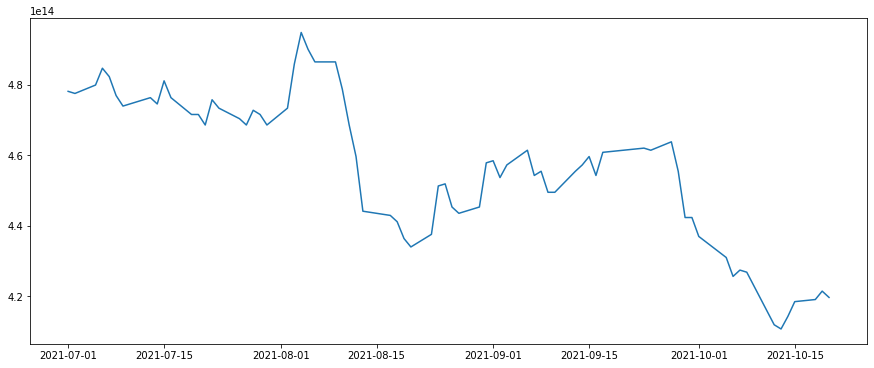

In [27]:

plt.figure(figsize=(15,6))
plt.plot(samsung01['x'],samsung01['y'])

In [28]:
samsung01['ch'] = np.nan

for i in range(samsung01.shape[0]-1):
  y2 = samsung01.iloc[i+1,1]
  y1 = samsung01.iloc[i,1]

  if (y2-y1>=0):
    samsung01.iloc[i,2] = 1
  else:
    samsung01.iloc[i,2] = 0

In [30]:
samsung01['ch_result'] = np.nan

for i in range(samsung01.shape[0]-1):
  

  check = samsung01.iloc[i,2] != samsung01.iloc[i+1,2]
  if(check):
    samsung01.iloc[i+1,3]= True
  else:
    samsung01.iloc[i+1,3]= False

In [31]:
check = samsung01[samsung01['ch_result']==True]
check.reset_index(drop=True, inplace= True)


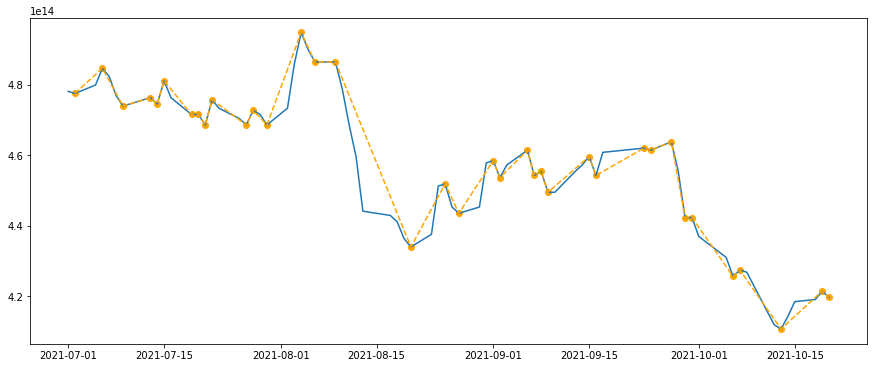

In [32]:
x = list(check.x)
y = list(check.y)

plt.figure(figsize=(15,6))
plt.plot(samsung01['x'],samsung01['y'])
plt.scatter(x,y, color = "orange")
plt.plot(x,y, color = "orange", linestyle = "--")
plt.show()

In [33]:
df = check[['x']]
df= df.iloc[:-1]
df['x2'] = np.nan
df['y1'] = np.nan
df['y2'] = np.nan
df.rename(columns ={'x':'x1'}, inplace = True)
df['t'] = np.nan
df['p'] = 0.0

for i in range(df.shape[0]):
  
  df.iloc[i,1] = check.iloc[i+1,0]
  df.iloc[i,2] = check.iloc[i,1]
  df.iloc[i,3] = check.iloc[i+1,1]

for i in range(df.shape[0]):
  t = df.iloc[i,1] - df.iloc[i,0]
  df.iloc[i,4] = t.days

  y1 = df.iloc[i,2]
  y2 = df.iloc[i,3]
  result = (abs(y2 - y1 )) / ((y1+y2)/2 )
  df.iloc[i,5] = result
df

,x1,x2,y1,y2,t,p
0,2021-07-02,2021-07-06 00:00:00,4.775826e+14,4.847463e+14,4.0,0.014888
1,2021-07-06,2021-07-09 00:00:00,4.847463e+14,4.740007e+14,3.0,0.022416
2,2021-07-09,2021-07-13 00:00:00,4.740007e+14,4.763886e+14,4.0,0.005025
3,2021-07-13,2021-07-14 00:00:00,4.763886e+14,4.745977e+14,1.0,0.003766
4,2021-07-14,2021-07-15 00:00:00,4.745977e+14,4.811645e+14,1.0,0.013741
5,2021-07-15,2021-07-19 00:00:00,4.811645e+14,4.716128e+14,4.0,0.020050
6,2021-07-19,2021-07-20 00:00:00,4.716128e+14,4.716128e+14,1.0,0.000000
7,2021-07-20,2021-07-21 00:00:00,4.716128e+14,4.686279e+14,1.0,0.006349
8,2021-07-21,2021-07-22 00:00:00,4.686279e+14,4.757917e+14,1.0,0.015171
9,2021-07-22,2021-07-27 00:00:00,4.757917e+14,4.686279e+14,5.0,0.015171


In [34]:
#t = 5 p = 0.01로 조건 변경
t = df['t'] <5
p = df['p']<0.01

result = df[~t&~p]
result

,x1,x2,y1,y2,t,p
9,2021-07-22,2021-07-27 00:00:00,4.757917e+14,4.686279e+14,5.0,0.015171
12,2021-07-30,2021-08-04 00:00:00,4.686279e+14,4.948950e+14,5.0,0.054523
15,2021-08-09,2021-08-20 00:00:00,4.865373e+14,4.340032e+14,11.0,0.114137
16,2021-08-20,2021-08-25 00:00:00,4.340032e+14,4.519125e+14,5.0,0.040431
18,2021-08-27,2021-09-01 00:00:00,4.435548e+14,4.584793e+14,5.0,0.033091
24,2021-09-09,2021-09-15 00:00:00,4.495246e+14,4.596733e+14,6.0,0.022324
26,2021-09-16,2021-09-23 00:00:00,4.543005e+14,4.620612e+14,7.0,0.016938
31,2021-09-30,2021-10-06 00:00:00,4.423609e+14,4.256455e+14,6.0,0.038514
33,2021-10-07,2021-10-13 00:00:00,4.274364e+14,4.107210e+14,6.0,0.039886
34,2021-10-13,2021-10-19 00:00:00,4.107210e+14,4.214666e+14,6.0,0.025825


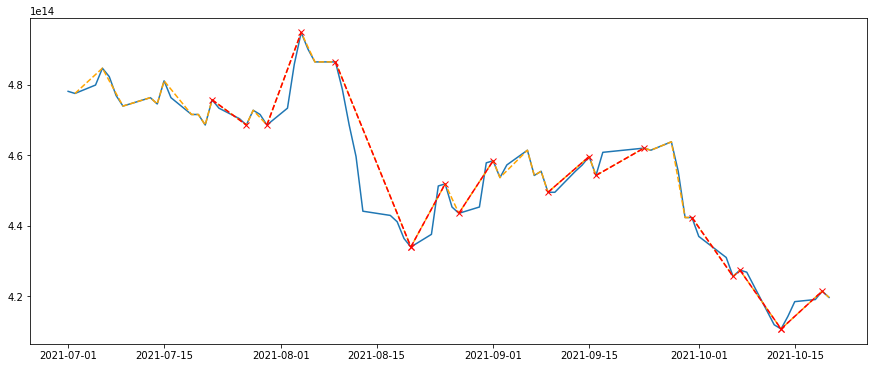

In [35]:
x1 = list(df.iloc[0,:2])
y1 = list(df.iloc[0,2:4])

plt.figure(figsize=(15,6))
plt.plot(samsung01['x'],samsung01['y'])
plt.plot(x,y, color = "orange", linestyle = "--")
#plt.scatter(x,y)
for i in range(result.shape[0]):
  x1 = list(result.iloc[i,:2])
  y1 = list(result.iloc[i,2:4])
  plt.plot(x1,y1, "rx--")
plt.show()

In [36]:
#빨간 점 X 뽑아내기

red_x = list(result['x1'])+ list(result['x2'])
red_x = list(set(red_x))
red_x.sort()
red_x

[Timestamp('2021-07-22 00:00:00'),
 Timestamp('2021-07-27 00:00:00'),
 Timestamp('2021-07-30 00:00:00'),
 Timestamp('2021-08-04 00:00:00'),
 Timestamp('2021-08-09 00:00:00'),
 Timestamp('2021-08-20 00:00:00'),
 Timestamp('2021-08-25 00:00:00'),
 Timestamp('2021-08-27 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-09-09 00:00:00'),
 Timestamp('2021-09-15 00:00:00'),
 Timestamp('2021-09-16 00:00:00'),
 Timestamp('2021-09-23 00:00:00'),
 Timestamp('2021-09-30 00:00:00'),
 Timestamp('2021-10-06 00:00:00'),
 Timestamp('2021-10-07 00:00:00'),
 Timestamp('2021-10-13 00:00:00'),
 Timestamp('2021-10-19 00:00:00')]

In [37]:
red = samsung01[samsung01.x == red_x[0]]

for i in red_x:
  df = samsung01[samsung01.x == i]
  red = red.append(df,ignore_index = True )

red = red.iloc[1:,:]

df1 = red[['x']]
df1= df1.iloc[:-1]
df1['x2'] = np.nan
df1['y1'] = np.nan
df1['y2'] = np.nan
df1.rename(columns ={'x':'x1'}, inplace = True)
df1['t'] = np.nan
df1['p'] = 0.0

for i in range(df1.shape[0]):
  
  df1.iloc[i,1] = red.iloc[i+1,0]
  df1.iloc[i,2] = red.iloc[i,1]
  df1.iloc[i,3] = red.iloc[i+1,1]

for i in range(df1.shape[0]):
  t = df1.iloc[i,1] - df1.iloc[i,0]
  df1.iloc[i,4] = t.days

  y1 = df1.iloc[i,2]
  y2 = df1.iloc[i,3]
  result = (abs(y2 - y1 )) / ((y1+y2)/2 )
  df1.iloc[i,5] = result

df1

,x1,x2,y1,y2,t,p
1,2021-07-22,2021-07-27 00:00:00,4.757917e+14,4.686279e+14,5.0,0.015171
2,2021-07-27,2021-07-30 00:00:00,4.686279e+14,4.686279e+14,3.0,0.000000
3,2021-07-30,2021-08-04 00:00:00,4.686279e+14,4.948950e+14,5.0,0.054523
4,2021-08-04,2021-08-09 00:00:00,4.948950e+14,4.865373e+14,5.0,0.017032
5,2021-08-09,2021-08-20 00:00:00,4.865373e+14,4.340032e+14,11.0,0.114137
6,2021-08-20,2021-08-25 00:00:00,4.340032e+14,4.519125e+14,5.0,0.040431
7,2021-08-25,2021-08-27 00:00:00,4.519125e+14,4.435548e+14,2.0,0.018667
8,2021-08-27,2021-09-01 00:00:00,4.435548e+14,4.584793e+14,5.0,0.033091
9,2021-09-01,2021-09-09 00:00:00,4.584793e+14,4.495246e+14,8.0,0.019724
10,2021-09-09,2021-09-15 00:00:00,4.495246e+14,4.596733e+14,6.0,0.022324


In [38]:
t =df1['t'] <5
p = df1['p']<0.01


result1 = df1[~t&~p]
result1


,x1,x2,y1,y2,t,p
1,2021-07-22,2021-07-27 00:00:00,4.757917e+14,4.686279e+14,5.0,0.015171
3,2021-07-30,2021-08-04 00:00:00,4.686279e+14,4.948950e+14,5.0,0.054523
4,2021-08-04,2021-08-09 00:00:00,4.948950e+14,4.865373e+14,5.0,0.017032
5,2021-08-09,2021-08-20 00:00:00,4.865373e+14,4.340032e+14,11.0,0.114137
6,2021-08-20,2021-08-25 00:00:00,4.340032e+14,4.519125e+14,5.0,0.040431
8,2021-08-27,2021-09-01 00:00:00,4.435548e+14,4.584793e+14,5.0,0.033091
9,2021-09-01,2021-09-09 00:00:00,4.584793e+14,4.495246e+14,8.0,0.019724
10,2021-09-09,2021-09-15 00:00:00,4.495246e+14,4.596733e+14,6.0,0.022324
12,2021-09-16,2021-09-23 00:00:00,4.543005e+14,4.620612e+14,7.0,0.016938
13,2021-09-23,2021-09-30 00:00:00,4.620612e+14,4.423609e+14,7.0,0.043564


In [39]:
#기울기(m) 열 추가
result1['m'] = np.nan
for i in range(result1.shape[0]):
  m = result1.iloc[i,3]- result1.iloc[i,2] 
  
  if (m>0):
    result1.iloc[i,6] = 1
  elif (m<0):
    result1.iloc[i,6] = -1
  else :
    result1.iloc[i,6] = 0
result1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,x1,x2,y1,y2,t,p,m
1,2021-07-22,2021-07-27 00:00:00,4.757917e+14,4.686279e+14,5.0,0.015171,-1.0
3,2021-07-30,2021-08-04 00:00:00,4.686279e+14,4.948950e+14,5.0,0.054523,1.0
4,2021-08-04,2021-08-09 00:00:00,4.948950e+14,4.865373e+14,5.0,0.017032,-1.0
5,2021-08-09,2021-08-20 00:00:00,4.865373e+14,4.340032e+14,11.0,0.114137,-1.0
6,2021-08-20,2021-08-25 00:00:00,4.340032e+14,4.519125e+14,5.0,0.040431,1.0
8,2021-08-27,2021-09-01 00:00:00,4.435548e+14,4.584793e+14,5.0,0.033091,1.0
9,2021-09-01,2021-09-09 00:00:00,4.584793e+14,4.495246e+14,8.0,0.019724,-1.0
10,2021-09-09,2021-09-15 00:00:00,4.495246e+14,4.596733e+14,6.0,0.022324,1.0
12,2021-09-16,2021-09-23 00:00:00,4.543005e+14,4.620612e+14,7.0,0.016938,1.0
13,2021-09-23,2021-09-30 00:00:00,4.620612e+14,4.423609e+14,7.0,0.043564,-1.0


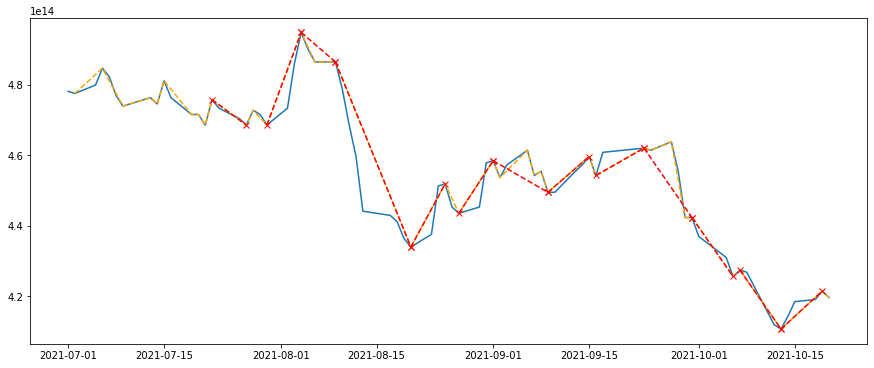

In [40]:
plt.figure(figsize=(15,6))
plt.plot(samsung01['x'],samsung01['y'])
plt.plot(x,y, color = "orange", linestyle = "--")
#plt.scatter(x,y)
for i in range(result1.shape[0]):
  x1 = list(result1.iloc[i,:2])
  y1 = list(result1.iloc[i,2:4])
  plt.plot(x1,y1, "rx--")
plt.show()

In [41]:
#빨간 점 X 뽑아내기

red_x1 = list(result1['x1'])+ list(result1['x2'])
red_x1 = list(set(red_x1))
red_x1.sort()
red_x1

[Timestamp('2021-07-22 00:00:00'),
 Timestamp('2021-07-27 00:00:00'),
 Timestamp('2021-07-30 00:00:00'),
 Timestamp('2021-08-04 00:00:00'),
 Timestamp('2021-08-09 00:00:00'),
 Timestamp('2021-08-20 00:00:00'),
 Timestamp('2021-08-25 00:00:00'),
 Timestamp('2021-08-27 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-09-09 00:00:00'),
 Timestamp('2021-09-15 00:00:00'),
 Timestamp('2021-09-16 00:00:00'),
 Timestamp('2021-09-23 00:00:00'),
 Timestamp('2021-09-30 00:00:00'),
 Timestamp('2021-10-06 00:00:00'),
 Timestamp('2021-10-07 00:00:00'),
 Timestamp('2021-10-13 00:00:00'),
 Timestamp('2021-10-19 00:00:00')]

In [42]:
red_x == red_x1 #이전과 동일

True

In [43]:
for i in range(result1.shape[0]-1):

  #i번째 기울기 음수일때
  if (result1.iloc[i,6]== -1):  
    #i+1번째 기울기 양수일 때
    if (result1.iloc[i+1,6] == 1): 
      if (result1.iloc[i,1] != result1.iloc[i+1,0]):
        if( result1.iloc[i,3]== result1.iloc[i+1,2] )  :
          red_x1.remove(result1.iloc[i,1])
    #i+1번째 기울기 음수일 때
    elif (result1.iloc [i+1,6]== -1):       
      red_x1.remove(result1.iloc[i,1])

  #i번째 기울기 양수일때
  else :   
    #i+1번째 기울기 양수일 때
    if (result1.iloc[i+1,6] == 1): 
      red_x1.remove(result1.iloc[i,1])  
     

red_x1

[Timestamp('2021-07-22 00:00:00'),
 Timestamp('2021-07-30 00:00:00'),
 Timestamp('2021-08-04 00:00:00'),
 Timestamp('2021-08-20 00:00:00'),
 Timestamp('2021-08-27 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-09-09 00:00:00'),
 Timestamp('2021-09-16 00:00:00'),
 Timestamp('2021-09-23 00:00:00'),
 Timestamp('2021-10-07 00:00:00'),
 Timestamp('2021-10-13 00:00:00'),
 Timestamp('2021-10-19 00:00:00')]

In [44]:
final = samsung01[samsung01.x == red_x1[0]]

for i in red_x1:
  df = samsung01[samsung01.x == i]
  final = final.append(df,ignore_index = True )

final = final.iloc[1:,:]

df2 = final[['x']]
df2= df2.iloc[:-1]
df2['x2'] = np.nan
df2['y1'] = np.nan
df2['y2'] = np.nan
df2.rename(columns ={'x':'x1'}, inplace = True)
df2['t'] = np.nan
df2['p'] = 0.0

for i in range(df2.shape[0]):
  
  df2.iloc[i,1] = final.iloc[i+1,0]
  df2.iloc[i,2] = final.iloc[i,1]
  df2.iloc[i,3] = final.iloc[i+1,1]

for i in range(df2.shape[0]):
  t = df2.iloc[i,1] - df2.iloc[i,0]
  df2.iloc[i,4] = t.days

  y1 = df2.iloc[i,2]
  y2 = df2.iloc[i,3]
  res = (abs(y2 - y1 )) / ((y1+y2)/2 )
  df2.iloc[i,5] = res

t =df2['t'] <5
p = df2['p']<0.05


result2 = df2[~(t&p)]

In [45]:
t =df2['t'] <5
p = df2['p']<0.01


result2 = df2[~t&~p]
result2

,x1,x2,y1,y2,t,p
1,2021-07-22,2021-07-30 00:00:00,4.757917e+14,4.686279e+14,8.0,0.015171
2,2021-07-30,2021-08-04 00:00:00,4.686279e+14,4.948950e+14,5.0,0.054523
3,2021-08-04,2021-08-20 00:00:00,4.948950e+14,4.340032e+14,16.0,0.131105
4,2021-08-20,2021-08-27 00:00:00,4.340032e+14,4.435548e+14,7.0,0.021769
5,2021-08-27,2021-09-01 00:00:00,4.435548e+14,4.584793e+14,5.0,0.033091
6,2021-09-01,2021-09-09 00:00:00,4.584793e+14,4.495246e+14,8.0,0.019724
7,2021-09-09,2021-09-16 00:00:00,4.495246e+14,4.543005e+14,7.0,0.010568
8,2021-09-16,2021-09-23 00:00:00,4.543005e+14,4.620612e+14,7.0,0.016938
9,2021-09-23,2021-10-07 00:00:00,4.620612e+14,4.274364e+14,14.0,0.077852
10,2021-10-07,2021-10-13 00:00:00,4.274364e+14,4.107210e+14,6.0,0.039886


In [46]:
result2['m'] = np.nan
for i in range(result2.shape[0]):
  m = result2.iloc[i,3]- result2.iloc[i,2]

  
  
  if (m>0):
    result2.iloc[i,6] = 1
  elif (m<0):
    result2.iloc[i,6] = -1
  else :
    result2.iloc[i,6] = 0
result2

,x1,x2,y1,y2,t,p,m
1,2021-07-22,2021-07-30 00:00:00,4.757917e+14,4.686279e+14,8.0,0.015171,-1.0
2,2021-07-30,2021-08-04 00:00:00,4.686279e+14,4.948950e+14,5.0,0.054523,1.0
3,2021-08-04,2021-08-20 00:00:00,4.948950e+14,4.340032e+14,16.0,0.131105,-1.0
4,2021-08-20,2021-08-27 00:00:00,4.340032e+14,4.435548e+14,7.0,0.021769,1.0
5,2021-08-27,2021-09-01 00:00:00,4.435548e+14,4.584793e+14,5.0,0.033091,1.0
6,2021-09-01,2021-09-09 00:00:00,4.584793e+14,4.495246e+14,8.0,0.019724,-1.0
7,2021-09-09,2021-09-16 00:00:00,4.495246e+14,4.543005e+14,7.0,0.010568,1.0
8,2021-09-16,2021-09-23 00:00:00,4.543005e+14,4.620612e+14,7.0,0.016938,1.0
9,2021-09-23,2021-10-07 00:00:00,4.620612e+14,4.274364e+14,14.0,0.077852,-1.0
10,2021-10-07,2021-10-13 00:00:00,4.274364e+14,4.107210e+14,6.0,0.039886,-1.0


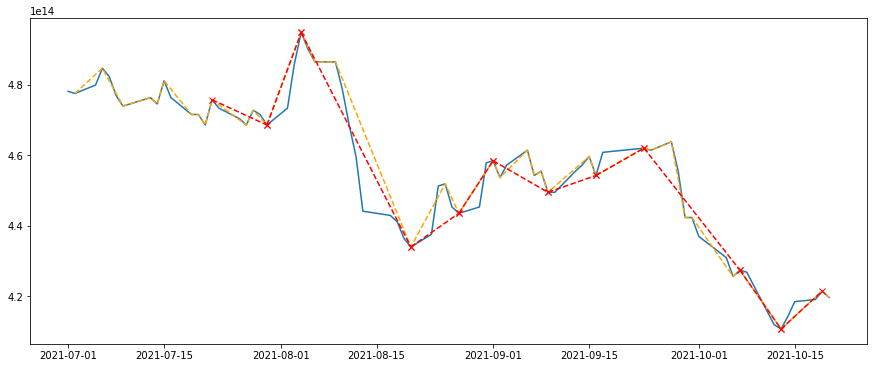

In [47]:
plt.figure(figsize=(15,6))
plt.plot(samsung01['x'],samsung01['y'])
plt.plot(x,y, color = "orange", linestyle = "--")
#plt.scatter(x,y)
for i in range(result2.shape[0]):
  x1 = list(result2.iloc[i,:2])
  y1 = list(result2.iloc[i,2:4])
  plt.plot(x1,y1, "rx--")
plt.show()

In [48]:
for i in range(result2.shape[0]-1):

  #i번째 기울기 음수일때
  if (result2.iloc[i,6]== -1):  
    #i+1번째 기울기 양수일 때
    if (result2.iloc[i+1,6] == 1): 
      if (result2.iloc[i,1] != result2.iloc[i+1,0]):
        if( result2.iloc[i,3]== result2.iloc[i+1,2] )  :
          red_x1.remove(result2.iloc[i,1])
    #i+1번째 기울기 음수일 때
    elif (result2.iloc [i+1,6]== -1):       
      red_x1.remove(result2.iloc[i,1])

  #i번째 기울기 양수일때
  else :   
    #i+1번째 기울기 양수일 때
    if (result2.iloc[i+1,6] == 1): 
      red_x1.remove(result2.iloc[i,1])  
     

red_x1

[Timestamp('2021-07-22 00:00:00'),
 Timestamp('2021-07-30 00:00:00'),
 Timestamp('2021-08-04 00:00:00'),
 Timestamp('2021-08-20 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-09-09 00:00:00'),
 Timestamp('2021-09-23 00:00:00'),
 Timestamp('2021-10-13 00:00:00'),
 Timestamp('2021-10-19 00:00:00')]

In [49]:
final = samsung01[samsung01.x == red_x1[0]]

for i in red_x1:
  df = samsung01[samsung01.x == i]
  final = final.append(df,ignore_index = True )

final = final.iloc[1:,:]

df2 = final[['x']]
df2= df2.iloc[:-1]
df2['x2'] = np.nan
df2['y1'] = np.nan
df2['y2'] = np.nan
df2.rename(columns ={'x':'x1'}, inplace = True)
df2['t'] = np.nan
df2['p'] = 0.0

for i in range(df2.shape[0]):
  
  df2.iloc[i,1] = final.iloc[i+1,0]
  df2.iloc[i,2] = final.iloc[i,1]
  df2.iloc[i,3] = final.iloc[i+1,1]

for i in range(df2.shape[0]):
  t = df2.iloc[i,1] - df2.iloc[i,0]
  df2.iloc[i,4] = t.days

  y1 = df2.iloc[i,2]
  y2 = df2.iloc[i,3]
  res = (abs(y2 - y1 )) / ((y1+y2)/2 )
  df2.iloc[i,5] = res

t =df2['t'] <5
p = df2['p']<0.01


result2 = df2[~t&~p]

result2['m'] = np.nan
for i in range(result2.shape[0]):
  m = result2.iloc[i,3]- result2.iloc[i,2]

  
  
  if (m>0):
    result2.iloc[i,6] = 1
  elif (m<0):
    result2.iloc[i,6] = -1
  else :
    result2.iloc[i,6] = 0
result2



,x1,x2,y1,y2,t,p,m
1,2021-07-22,2021-07-30 00:00:00,4.757917e+14,4.686279e+14,8.0,0.015171,-1.0
2,2021-07-30,2021-08-04 00:00:00,4.686279e+14,4.948950e+14,5.0,0.054523,1.0
3,2021-08-04,2021-08-20 00:00:00,4.948950e+14,4.340032e+14,16.0,0.131105,-1.0
4,2021-08-20,2021-09-01 00:00:00,4.340032e+14,4.584793e+14,12.0,0.054849,1.0
5,2021-09-01,2021-09-09 00:00:00,4.584793e+14,4.495246e+14,8.0,0.019724,-1.0
6,2021-09-09,2021-09-23 00:00:00,4.495246e+14,4.620612e+14,14.0,0.027505,1.0
7,2021-09-23,2021-10-13 00:00:00,4.620612e+14,4.107210e+14,20.0,0.117647,-1.0
8,2021-10-13,2021-10-19 00:00:00,4.107210e+14,4.214666e+14,6.0,0.025825,1.0


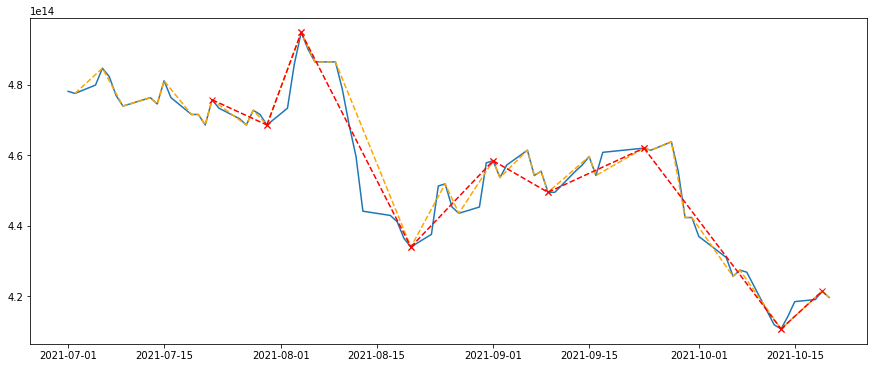

In [50]:
plt.figure(figsize=(15,6))
plt.plot(samsung01['x'],samsung01['y'])
plt.plot(x,y, color = "orange", linestyle = "--")
#plt.scatter(x,y)
for i in range(result2.shape[0]):
  x1 = list(result2.iloc[i,:2])
  y1 = list(result2.iloc[i,2:4])
  plt.plot(x1,y1, "rx--")
plt.show()

In [54]:
final = samsung01[samsung01.x == red_x1[0]]

for i in red_x1:
  df = samsung01[samsung01.x == i]
  final = final.append(df,ignore_index = True )

final = final.iloc[1:,:2]
final

,x,y
1,2021-07-22,4.757917e+14
2,2021-07-30,4.686279e+14
3,2021-08-04,4.948950e+14
4,2021-08-20,4.340032e+14
5,2021-09-01,4.584793e+14
6,2021-09-09,4.495246e+14
7,2021-09-23,4.620612e+14
8,2021-10-13,4.107210e+14
9,2021-10-19,4.214666e+14


In [59]:
for i in range(final.shape[0]-1):
  if(result2.iloc[i,6]== 1):
    final.iloc[i,1] = -1
  else :
    final.iloc[i,1] = 1

#final =final[1:final.shape[0]-1]
n = final.shape[0]-2
if(final.iloc[n,1]== -1):
  final.iloc[final.shape[0]-1,1] = 1
else:
  final.iloc[final.shape[0]-1,1] = -1

final

,x,y
1,2021-07-22,1.0
2,2021-07-30,-1.0
3,2021-08-04,1.0
4,2021-08-20,-1.0
5,2021-09-01,1.0
6,2021-09-09,-1.0
7,2021-09-23,1.0
8,2021-10-13,-1.0
9,2021-10-19,1.0


(737972.0, 738083.0)

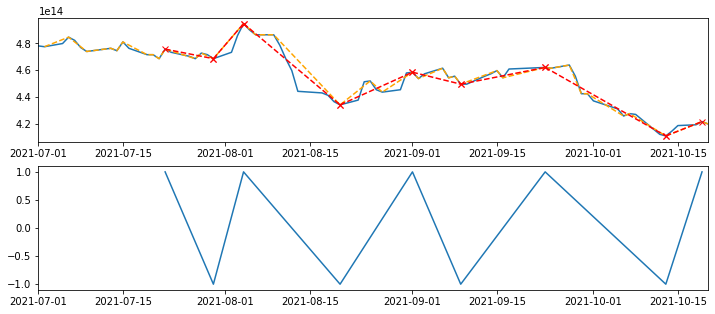

In [82]:
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)


ax1.plot(samsung01['x'],samsung01['y'])
ax1.set_xlim([datetime.date(2021, 7, 1), datetime.date(2021, 10, 20)])
ax1.plot(x,y, color = "orange", linestyle = "--")

for i in range(result2.shape[0]):
  x1 = list(result2.iloc[i,:2])
  y1 = list(result2.iloc[i,2:4])
  ax1.plot(x1,y1, "rx--")


ax2.plot(final['x'],final['y'])
ax2.set_xlim([datetime.date(2021, 7, 1), datetime.date(2021, 10, 20)])
